In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn  import linear_model

#model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn import metrics

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
#df.to_csv("C:/Users/vasud/project/h1n1_vaccine_prediction.csv")

In [4]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [5]:
df.shape

(26707, 34)

In [6]:
df.drop(["unique_id"],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [8]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [9]:
df.describe(include="all")

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [10]:
df.T.duplicated()

h1n1_worry                   False
h1n1_awareness               False
antiviral_medication         False
contact_avoidance            False
bought_face_mask             False
wash_hands_frequently        False
avoid_large_gatherings       False
reduced_outside_home_cont    False
avoid_touch_face             False
dr_recc_h1n1_vacc            False
dr_recc_seasonal_vacc        False
chronic_medic_condition      False
cont_child_undr_6_mnths      False
is_health_worker             False
has_health_insur             False
is_h1n1_vacc_effective       False
is_h1n1_risky                False
sick_from_h1n1_vacc          False
is_seas_vacc_effective       False
is_seas_risky                False
sick_from_seas_vacc          False
age_bracket                  False
qualification                False
race                         False
sex                          False
income_level                 False
marital_status               False
housing_status               False
employment          

### no duplicate values

In [11]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

## missing values

In [12]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

<AxesSubplot:>

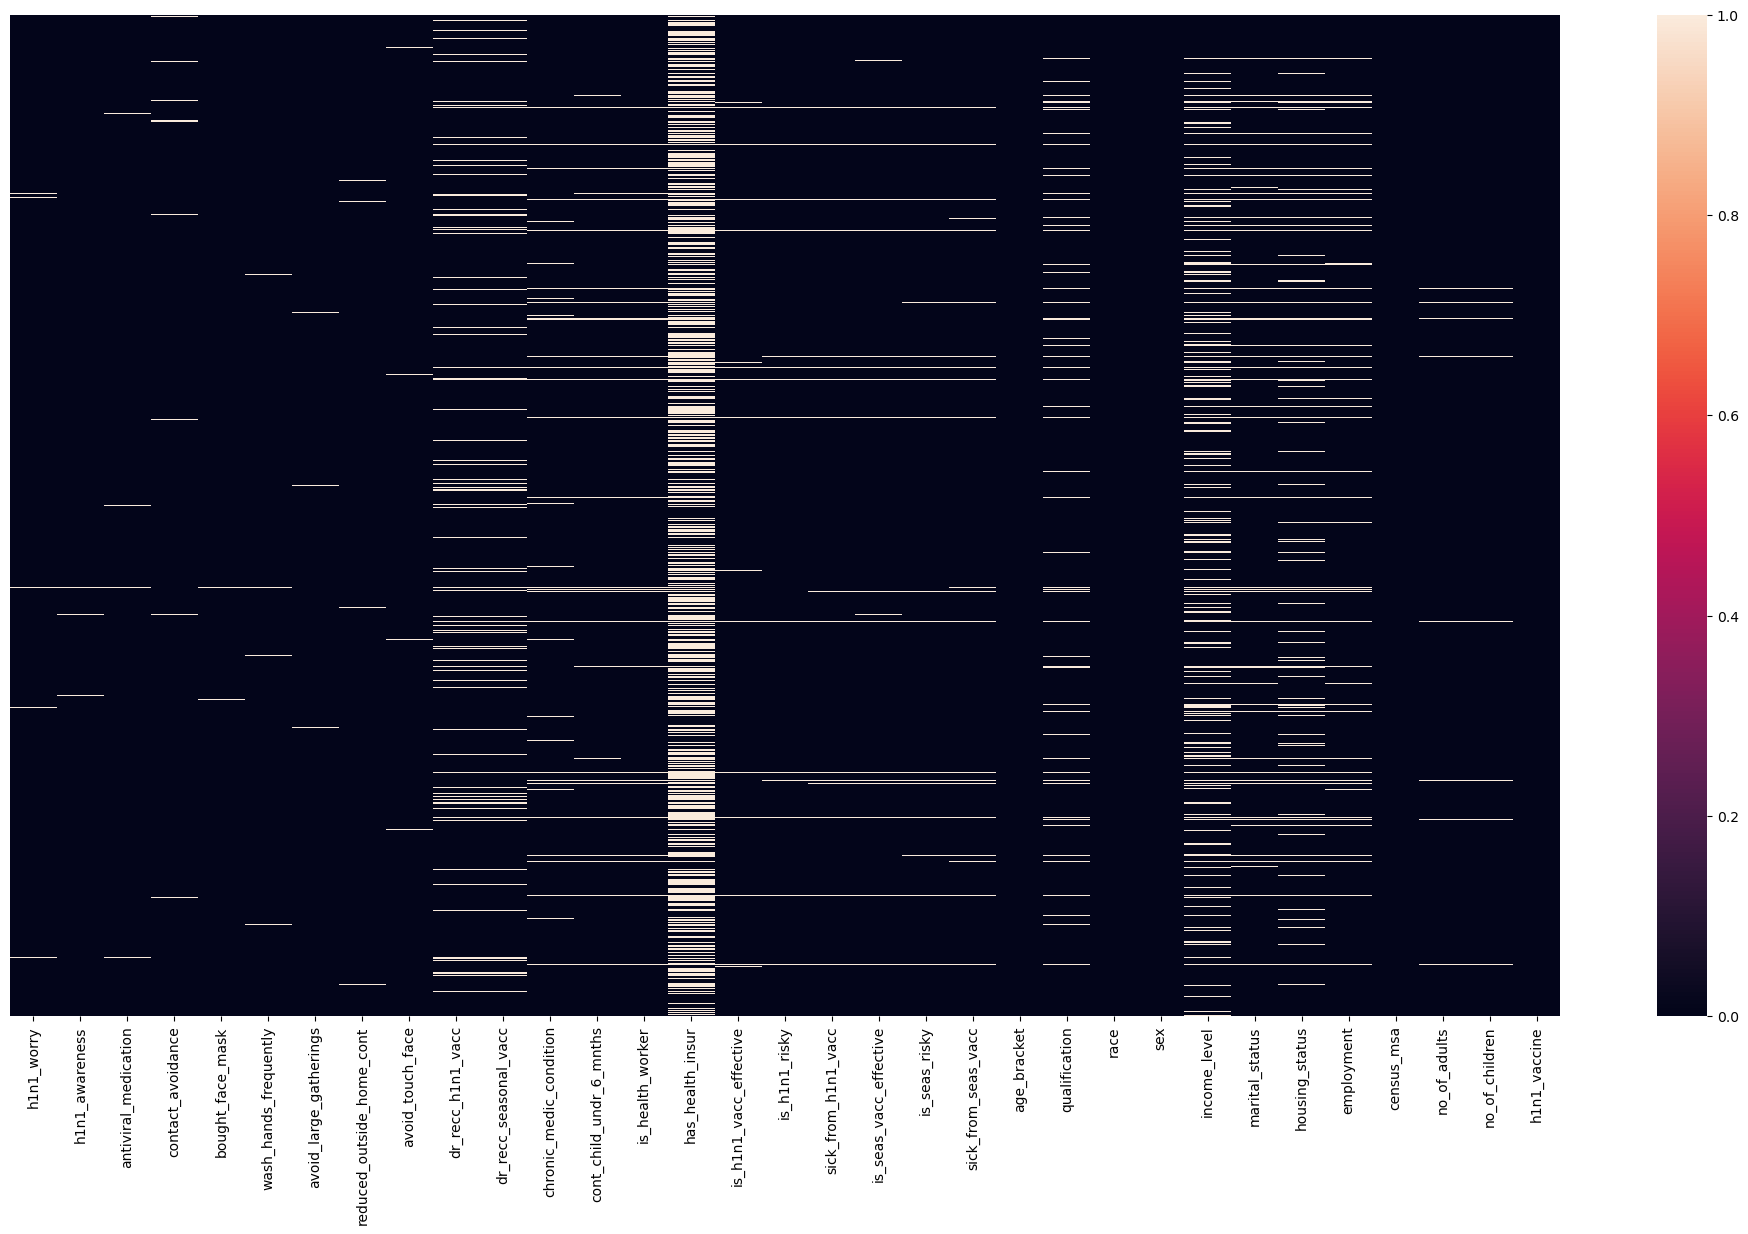

In [13]:
plt.figure(figsize=(25,13))
sns.heatmap(df.isnull(),yticklabels=False)

### removing null values

In [14]:
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)


df["h1n1_worry"].fillna(df["h1n1_worry"].mode()[0],inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].mode()[0],inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].mode()[0],inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].mode()[0],inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].mode()[0],inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].mode()[0],inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].mode()[0],inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].mode()[0],inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].mode()[0],inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].mode()[0],inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].mode()[0],inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].mode()[0],inplace=True)
df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].mode()[0],inplace=True)
df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].mode()[0],inplace=True)
df["is_seas_risky"].fillna(df["is_seas_risky"].mode()[0],inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].mode()[0],inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].mode()[0],inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].mode()[0],inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

<AxesSubplot:xlabel='sex', ylabel='count'>

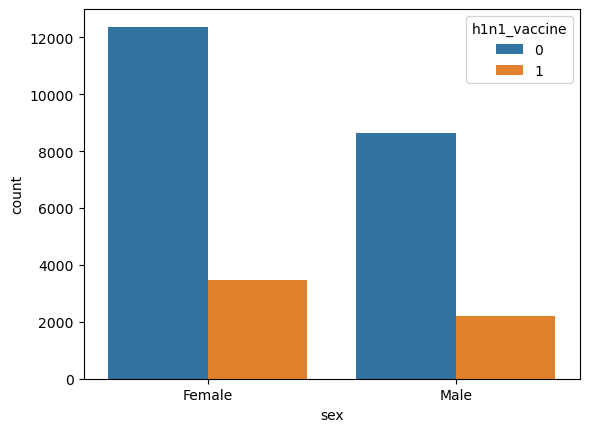

In [16]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

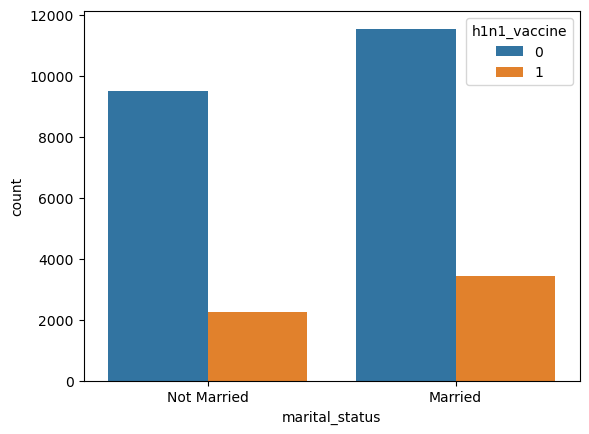

In [17]:
sns.countplot(x="marital_status",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='qualification', ylabel='count'>

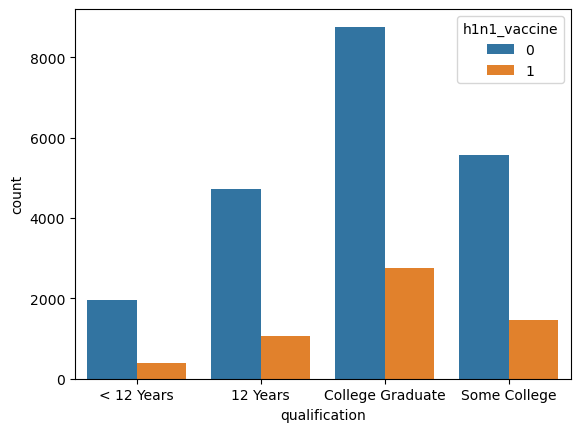

In [18]:
sns.countplot(x="qualification",hue="h1n1_vaccine",data=df)

In [19]:
pd.crosstab(df["h1n1_awareness"],df["h1n1_vaccine"])

h1n1_vaccine,0,1
h1n1_awareness,,
0.0,2145,361
1.0,12039,2675
2.0,6849,2638


In [20]:
pd.crosstab(df["avoid_large_gatherings"],df["h1n1_vaccine"])

h1n1_vaccine,0,1
avoid_large_gatherings,,
0.0,13609,3551
1.0,7424,2123


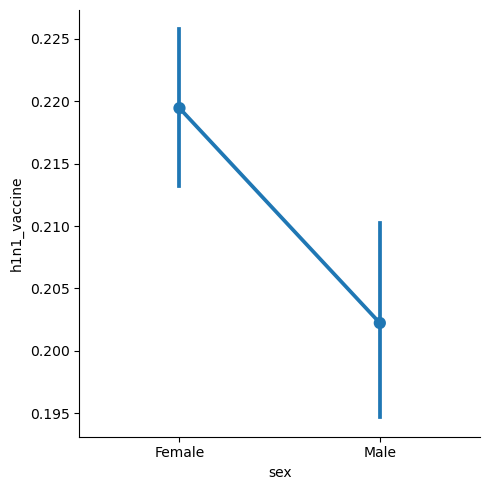

In [21]:
sns.catplot(x="sex",y="h1n1_vaccine",kind="point",data=df)

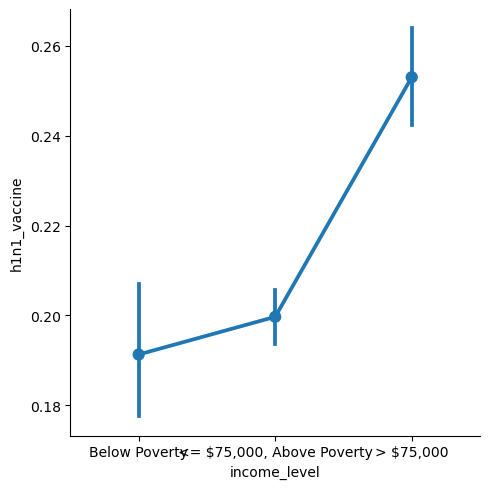

In [22]:
sns.catplot(x="income_level",y="h1n1_vaccine",kind="point",data=df)

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

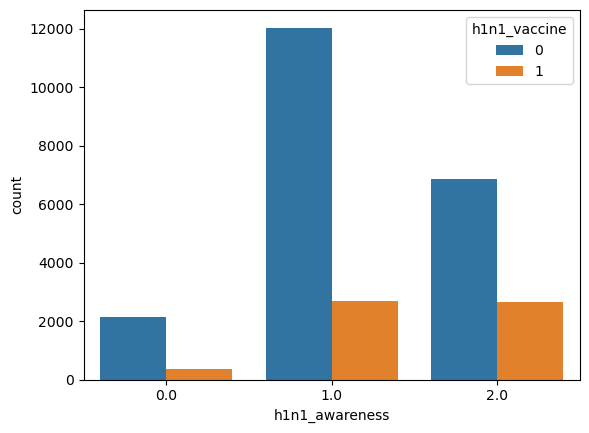

In [23]:
sns.countplot(x="h1n1_awareness",hue="h1n1_vaccine",data=df)

In [24]:
corrmat=df.iloc[:,1:].corr()

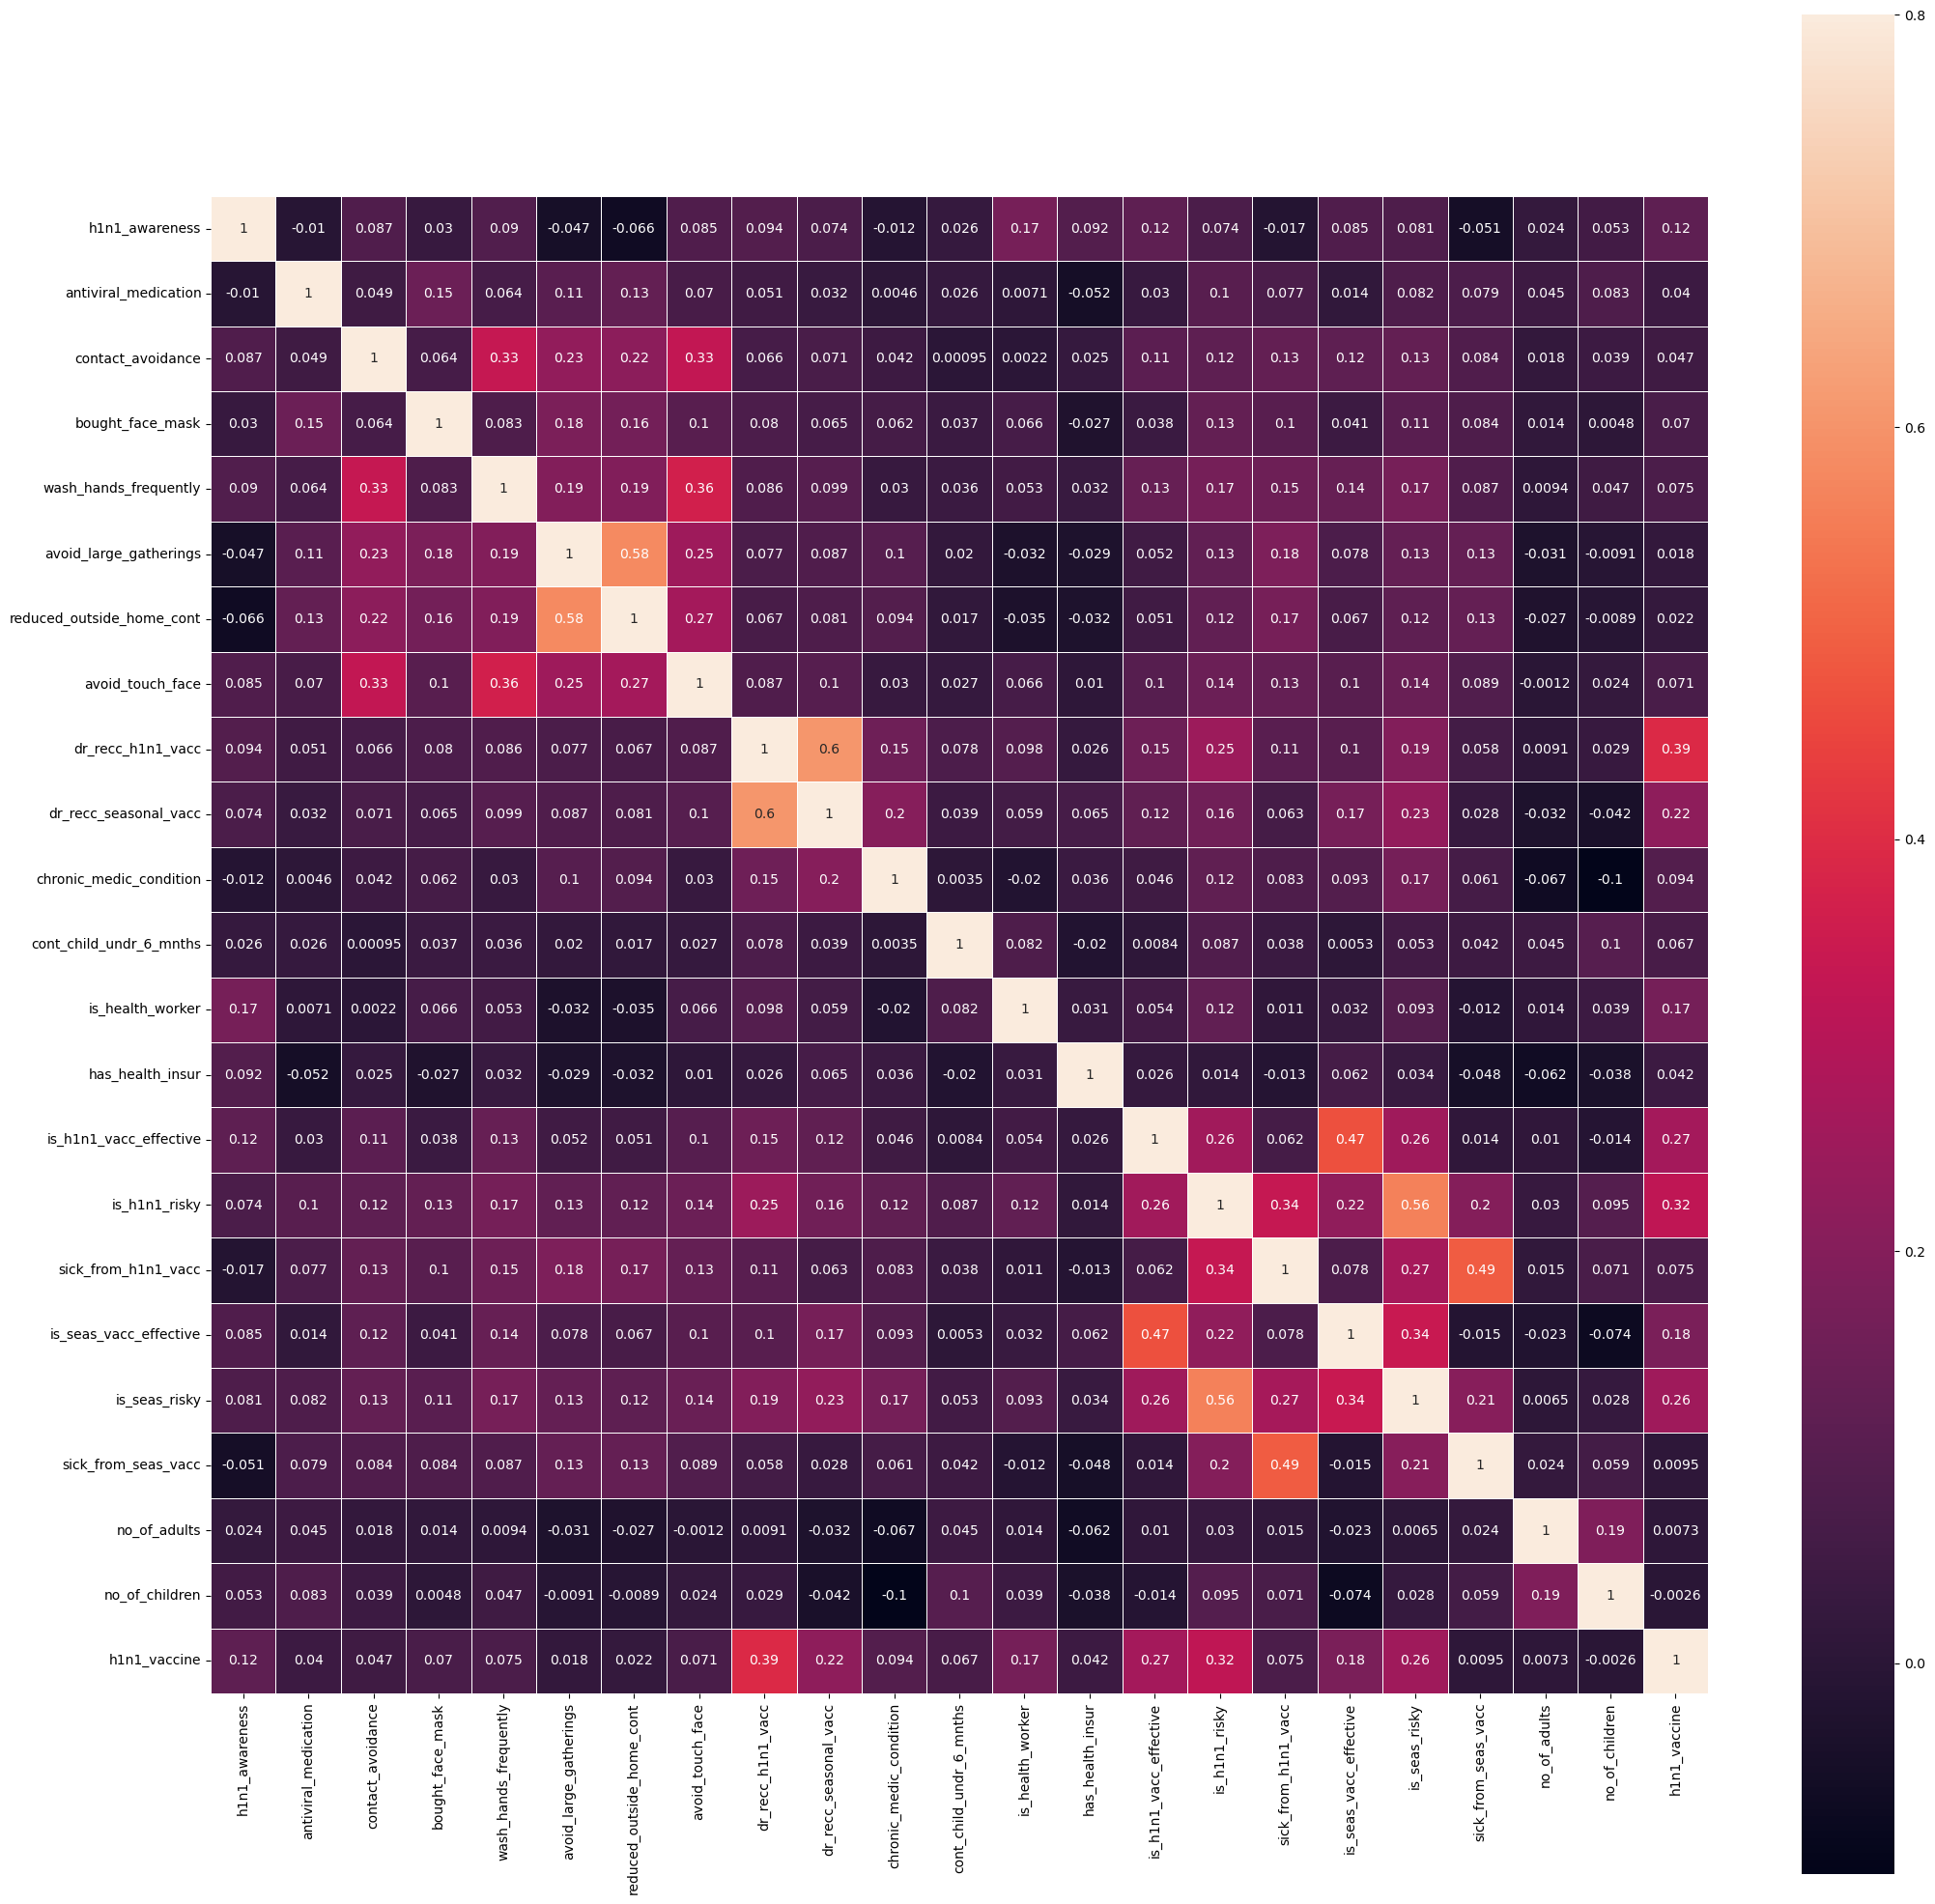

In [25]:
#corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,linewidths=.5)
plt.show()

In [26]:
df["qualification"]=le.fit_transform(df["qualification"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["income_level"]=le.fit_transform(df["income_level"])
df["marital_status"]=le.fit_transform(df["marital_status"])
df["housing_status"]=le.fit_transform(df["housing_status"])
df["employment"]=le.fit_transform(df["employment"])
df["census_msa"]=le.fit_transform(df["census_msa"])
df["no_of_adults"]=le.fit_transform(df["no_of_adults"])
df["no_of_children"]=le.fit_transform(df["no_of_children"])
df["age_bracket"]=le.fit_transform(df["age_bracket"])

In [27]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
qualification                  int32
race                           int32
sex                            int32
income_level                   int32
marital_status                 int32
h

In [28]:
df.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
24604,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,3,0,0,1,0,2,2,0,0,0
10875,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,1,1,0,0,0,0,1,0,1
9115,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
12102,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,3,0,1,0,0,0,0,1,0,1
18098,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,1,0,1,0,0,0,0,0,0
8785,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,0,0,0,0,0,1,1,0,0
882,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,0,0,0,2,2,0,1
15819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,0,0,0,1,1,2,0
7640,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,3,0,0,0,0,0,0,1,0,1
2907,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,2,1,1,1,1,1,0,1


# SPLIT DATASET

In [29]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

## LOGISTIC REGRESSION

In [31]:
model1=LogisticRegression(solver="liblinear")
model1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [32]:
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

0.832941050604472
0.8400099837763634


## DECISION TREE

In [33]:
model2=DecisionTreeClassifier(max_depth=3,criterion="gini",random_state=0)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
print(model2.score(x_train,y_train))

0.8221889376270461


In [35]:
y_predict=model2.predict(x_test)

In [36]:
print(model2.score(x_test,y_test))

0.8299014102084113


<AxesSubplot:>

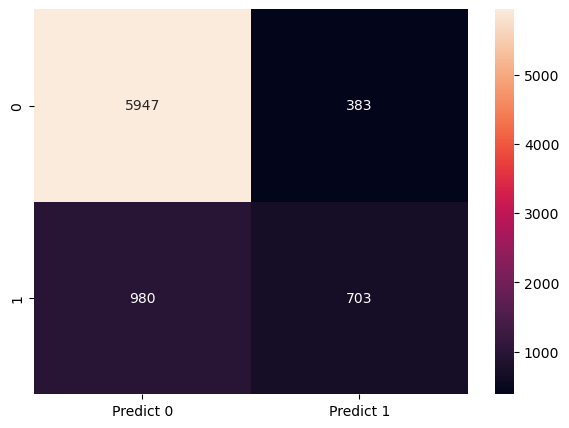

In [37]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## BAGGING CLASSIFIER

In [38]:
model3= BaggingClassifier(n_estimators=20,base_estimator=model2)
model3=model3.fit(x_train,y_train)
print(model3.score(x_train,y_train))
y_predict=model3.predict(x_test)
print(model3.score(x_test,y_test))

0.8227773617203381
0.8305253962311244


<AxesSubplot:>

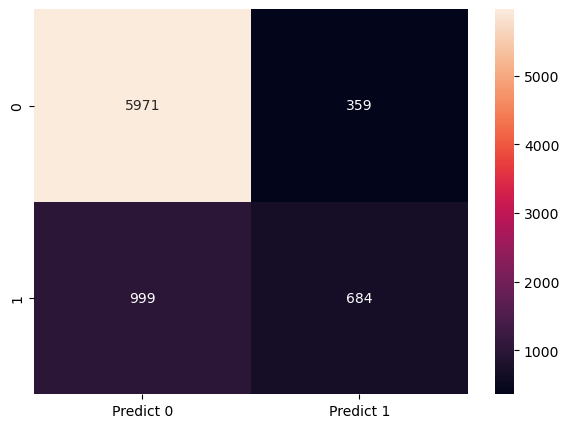

In [39]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## ADABOOST

In [40]:
model4= AdaBoostClassifier(n_estimators=120)
model4=model4.fit(x_train,y_train)
print(model4.score(x_train,y_train))
y_predict=model4.predict(x_test)
print(model4.score(x_test,y_test))

0.832941050604472
0.8408835642081617


<AxesSubplot:>

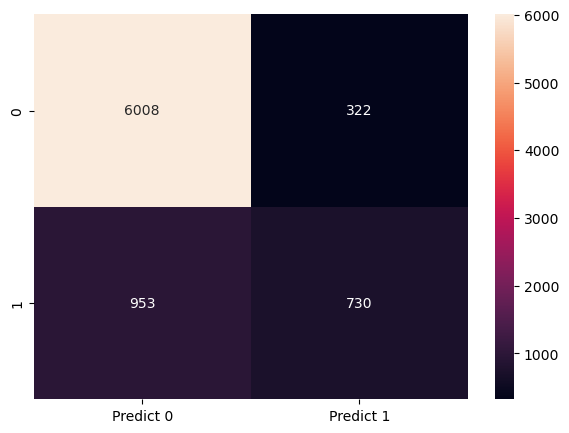

In [41]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## GRADIENTBOOST

In [42]:
model5= GradientBoostingClassifier(n_estimators=220)
model5=model5.fit(x_train,y_train)
print(model5.score(x_train,y_train))
y_predict=model5.predict(x_test)
print(model5.score(x_test,y_test))

0.8466887771477479
0.8467490328216648


<AxesSubplot:>

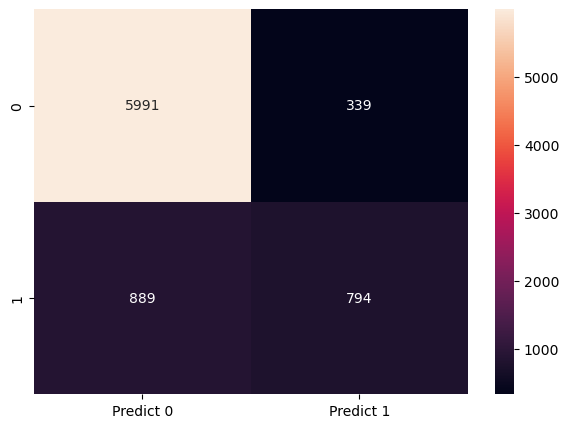

In [43]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [44]:
model6= RandomForestClassifier(n_estimators=160,max_features=3)
model6=model6.fit(x_train,y_train)
print(model6.score(x_train,y_train))
y_predict=model6.predict(x_test)
print(model6.score(x_test,y_test))

0.9999465069006098
0.8378884312991389


<AxesSubplot:>

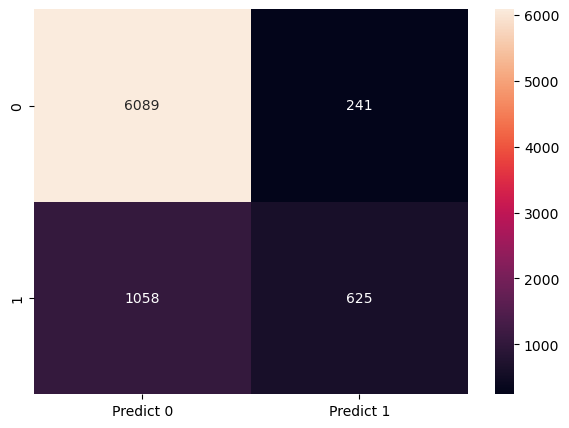

In [45]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [46]:
model7= SVC(random_state=20,C=100,kernel='poly')
model7=model7.fit(x_train,y_train)
print(model7.score(x_train,y_train))
y_predict=model7.predict(x_test)
print(model7.score(x_test,y_test))

0.8809778538568525
0.8311493822538375


<AxesSubplot:>

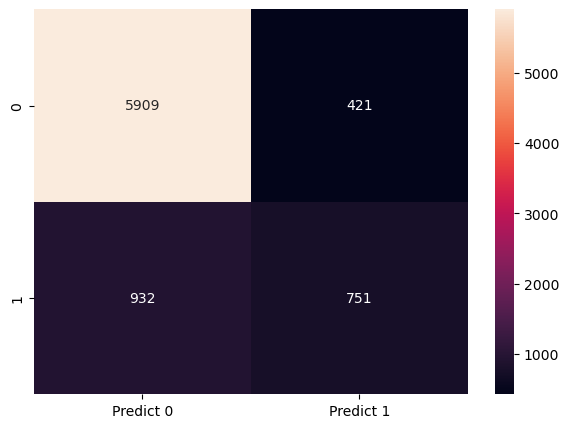

In [47]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["0","1"]],
                     columns=[i for i in["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

###  for this dataset i observe that DecisionTree and GradienBoosting works better than any other model for above observation and hyperparameter used